In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
pd.set_option('display.max_columns', None)

Датасет: Online Gaming Anxiety Data

(первоначальный источник - https://osf.io/vnbxk/)

Датасет сопоставляет оценки по шкалам SWL(удовлетворенность жизнью), GAD(Генерализованное тревожное расстройство), SPIN(Социальное тревожное расстройство/"Социофобия"), полученные в результате опросника, с "игровыми привичками" и социо-экономическими факторами игроков в онлайн игры


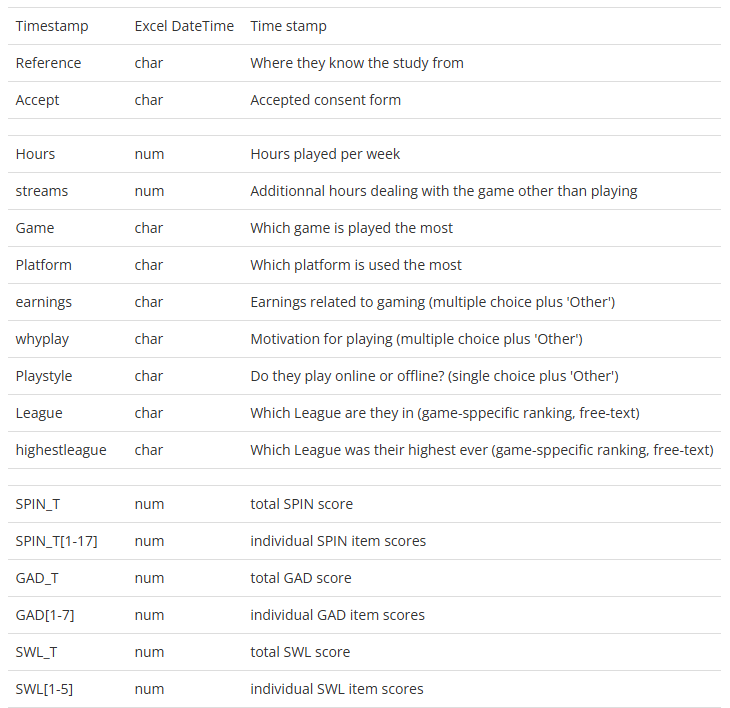
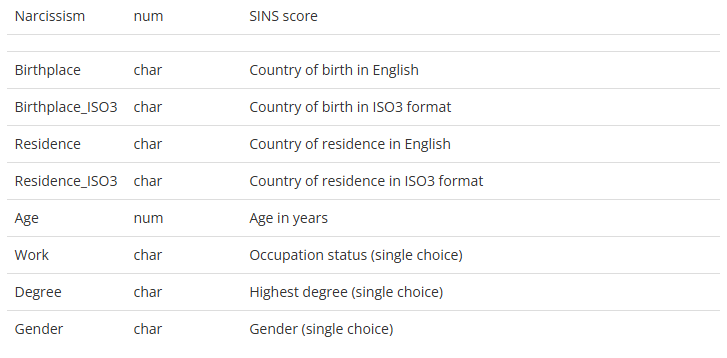

In [87]:
# считаем датасет из файла
file = '/kaggle/input/online-gaming-anxiety-data/GamingStudy_data.csv'
df = pd.read_csv(file, encoding = 'ISO-8859-1')

In [88]:
# выведем первые 5 строк
df.head(5)

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,highestleague,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,3,5,5,5,5,Skyrim,"Console (PS, Xbox, ...)",15.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,3,5,2,5,1,Other,PC,8.0,I play for fun,having fun,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,2,6,5,2,2,Other,PC,0.0,I play for fun,having fun,NaN,NaN,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,2,5,5,3,2,Other,PC,20.0,I play for fun,improving,NaN,NaN,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,2,2,4,5,1,Other,"Console (PS, Xbox, ...)",20.0,I play for fun,having fun,NaN,NaN,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [50]:
# размер
df.shape

(13464, 55)

In [21]:
# общая информация 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [89]:
# отбрасываем прям совсем ненужные столбцы
columns_to_drop=[
    'Residence_ISO3',  # дублирует признак Residence 
    'Birthplace_ISO3', # дублирует признак Birthplace
    'accept',          # это просто согласие на обработку данных...
    'highestleague',   # все значения null 
    'Reference',       # откуда респондент узнал про опрос
    'Timestamp',       # время
    'S. No.'           # порядковый номер респондента
]
df.drop(columns_to_drop, axis=1, inplace=True)

In [71]:
# посмотрим на количество пропусков в столбцах
df.isnull().sum()

GAD1             0
GAD2             0
GAD3             0
GAD4             0
GAD5             0
GAD6             0
GAD7             0
GADE           649
SWL1             0
SWL2             0
SWL3             0
SWL4             0
SWL5             0
Game             0
Platform         0
Hours           30
earnings         0
whyplay          0
League        1852
streams        100
SPIN1          124
SPIN2          154
SPIN3          140
SPIN4          159
SPIN5          166
SPIN6          156
SPIN7          138
SPIN8          144
SPIN9          158
SPIN10         160
SPIN11         187
SPIN12         168
SPIN13         187
SPIN14         156
SPIN15         147
SPIN16         147
SPIN17         175
Narcissism      23
Gender           0
Age              0
Work            38
Degree        1577
Birthplace       0
Residence        0
Playstyle        0
GAD_T            0
SWL_T            0
SPIN_T         650
dtype: int64

Переменные GAD_T, SWL_T, SPIN_T - это просто суммы ответов на вопросы GAD 1-7, SWL 1-5 и SPIN 1-17 соответственно. 

In [90]:
# отбросим те наблюдения, где пропущены вообще *все* 17 признаков SPIN
cols_to_check=['SPIN1', 'SPIN2',	
               'SPIN3', 'SPIN4',	
               'SPIN5',	'SPIN6',	
               'SPIN7',	'SPIN8',	
               'SPIN9',	'SPIN10',	
               'SPIN11', 'SPIN12',	
               'SPIN13', 'SPIN14',	
               'SPIN15', 'SPIN16',
               'SPIN17'
               ]
df.dropna(subset=cols_to_check, how='all', axis=0, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

In [116]:
# заполняем пропуски на моду (у столбцов с дискретными величинами и у категориальных)
imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
cols_ = cols_to_check + ['Narcissism', 'League', 'Degree', 'Work']  # колонки, которые будут заполнены 

for col in cols_:
    df[[col]] = imp.fit_transform(df[[col]])

In [109]:
# а эти - на среднее значение
imp = SimpleImputer(missing_values=pd.NA , strategy = 'mean')

cols = ['streams', 'Hours']
for col in cols:
    df[[col]] = imp.fit_transform(df[[col]])

In [125]:
# теперь можно заполнить оставшиеся пропуски SPIN_T, посчитав суммы SPIN(1 - 17)
df['SPIN_T'] = df['SPIN_T'].fillna(df[cols_to_check].sum(axis=1))
df.isnull().sum().sum()     
# пропусков больше нет

0

In [ ]:
# есть ли дубликаты
df.duplicated().sum()

In [123]:
# удаляем дубликаты
df.drop_duplicates(inplace=True)

In [135]:
categorical = df.select_dtypes(include='object').columns
categorical

Index(['Game', 'Platform', 'earnings', 'whyplay', 'League', 'Gender', 'Work',
       'Degree', 'Birthplace', 'Residence', 'Playstyle'],
      dtype='object')

In [154]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
for col in categorical:
    df[col] = enc.fit_transform(df[col])

In [155]:
df.head()

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,SWL1,SWL2,SWL3,SWL4,SWL5,Game,Platform,Hours,earnings,whyplay,League,streams,SPIN1,SPIN2,SPIN3,SPIN4,SPIN5,SPIN6,SPIN7,SPIN8,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,Narcissism,Gender,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,SWL_T,SPIN_T
0,0,0,0,0,1,0,0,3,5,5,5,5,8,0,15.0,62,279,275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1,25,3,0,117,103,199,1,23,5.0
1,1,2,2,2,0,1,0,3,5,2,5,1,7,1,8.0,62,279,275,2.0,2.0,1.0,1.0,3.0,2.0,3.0,1.0,3.0,4.0,0.0,3.0,0.0,1.0,3.0,3.0,1.0,2.0,1.0,1,41,3,0,117,103,121,8,16,33.0
2,0,2,2,0,0,3,1,2,6,5,2,2,7,1,0.0,62,279,275,0.0,1.0,0.0,1.0,2.0,3.0,4.0,2.0,1.0,0.0,1.0,1.0,3.0,0.0,2.0,4.0,4.0,2.0,4.0,0,32,0,0,39,34,199,8,17,31.0
3,0,0,0,0,0,0,0,2,5,5,3,2,7,1,20.0,62,303,275,5.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,2.0,1,28,0,0,117,103,111,0,17,11.0
4,2,1,2,2,2,3,2,2,2,4,5,1,7,0,20.0,62,279,275,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1,19,0,1,117,90,121,14,14,13.0


In [159]:
same_thing = ['SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']
same_thing = same_thing + cols_to_check
print(same_thing)

['SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17']
